In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
path = '/content/drive/MyDrive/united_data/db/united_data.csv'

In [52]:
import pandas as pd

data = pd.read_csv(path, sep=';')

In [53]:
data.head()

,Jogador,Clube,Temporada,Minutos Jogados,Gols,Ass,GCC,Gols/90',Ass/90',GCC/90',NS
0,Antony,Man United,24/25,427,1,0,1,0.2,0.0,0.2,6.83
1,Antony,Man United,23/24,1347,1,1,7,0.1,0.1,0.5,6.96
2,Antony,Real Betis,24/25,1364,5,2,8,0.3,0.1,0.5,7.47
3,Rashford,Man United,24/25,1501,7,3,6,0.4,0.2,0.4,7.04
4,Rashford,Aston Villa,24/25,940,4,5,11,0.4,0.5,1.1,7.24


In [54]:
player_colors = {
    'Antony': (0, 122, 51),        # Real Betis (verde)
    'Rashford': (152, 0, 46),      # Aston Villa (claret)
    'Lukaku': (19, 55, 124),       # Internazionale (azul)
    'McTominay': (0, 95, 189),     # Napoli (azzurro)
    'Elanga': (229, 0, 14)         # Nottingham Forest (vermelho)
}

In [55]:
data['Participacao Gols/90'] = ((data['Gols'] + data['Ass']) * 90) / data['Minutos Jogados']

In [56]:
data.head()

,Jogador,Clube,Temporada,Minutos Jogados,Gols,Ass,GCC,Gols/90',Ass/90',GCC/90',NS,Participacao Gols/90
0,Antony,Man United,24/25,427,1,0,1,0.2,0.0,0.2,6.83,0.210773
1,Antony,Man United,23/24,1347,1,1,7,0.1,0.1,0.5,6.96,0.133630
2,Antony,Real Betis,24/25,1364,5,2,8,0.3,0.1,0.5,7.47,0.461877
3,Rashford,Man United,24/25,1501,7,3,6,0.4,0.2,0.4,7.04,0.599600
4,Rashford,Aston Villa,24/25,940,4,5,11,0.4,0.5,1.1,7.24,0.861702


In [57]:
data.columns

Index(['Jogador', 'Clube', 'Temporada', 'Minutos Jogados', 'Gols', 'Ass',
       'GCC', 'Gols/90'', 'Ass/90'', 'GCC/90'', 'NS', 'Participacao Gols/90'],
      dtype='object')

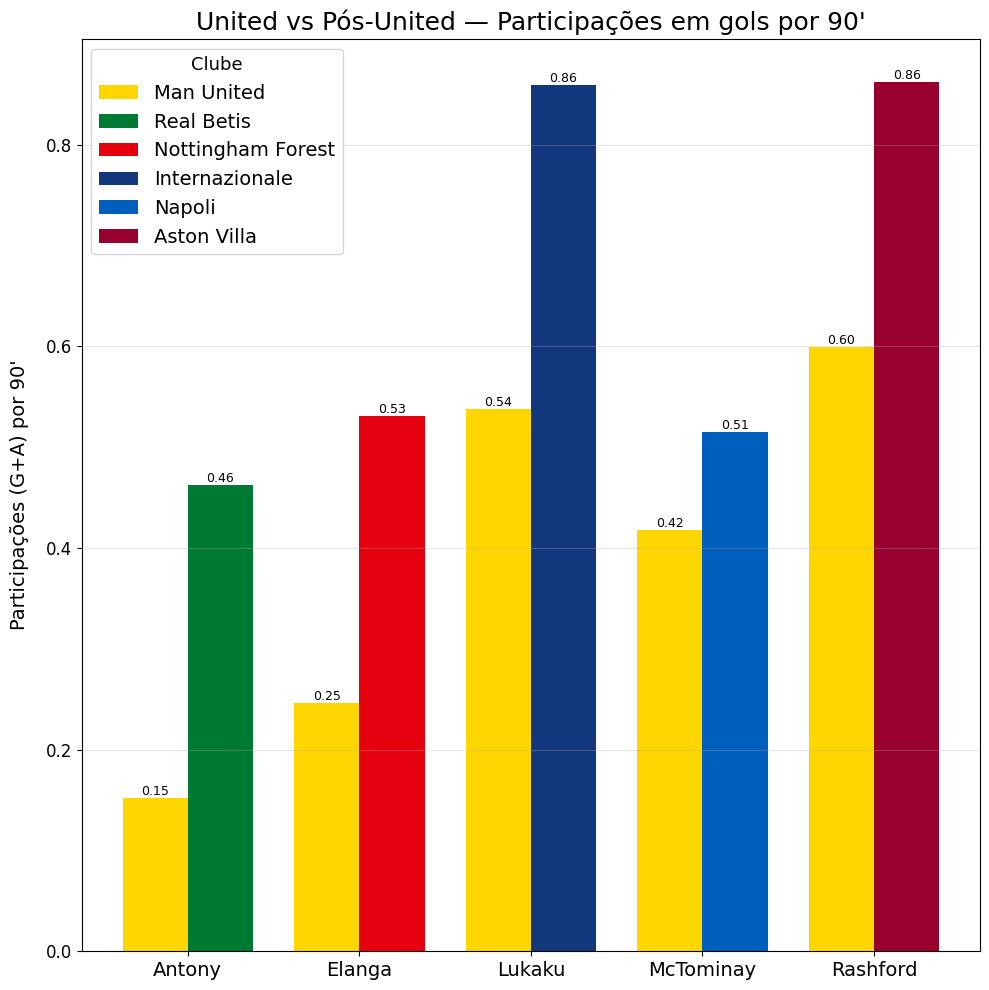

In [58]:
players = comp.index.tolist()
x = np.arange(len(players))
w = 0.38

plt.figure(figsize=(10,10))

# United em amarelo (fixo)
plt.bar(x - w/2, comp["United_pa90"], width=w, color=(1.0, 0.84, 0.0), label="Man United")

# construir legenda dos clubes pós-United
clubes_pos = {}
for p in players:
    clubes = data.loc[(data["Jogador"]==p) & (data["Clube"]!="Man United"), "Clube"].unique()
    if len(clubes) > 0:
        clubes_pos[p] = clubes[0]

# barras pós-United com rótulo individual por clube
for xi, p in enumerate(players):
    plt.bar(xi + w/2, comp.loc[p, "PosUnited_pa90"], width=w,
            color=tuple(c/255 for c in player_colors[p]),
            label=clubes_pos.get(p, "Pós-United"))

plt.xticks(x, players)
plt.ylabel("Participações (G+A) por 90'")
plt.title("United vs Pós-United — Participações em gols por 90'")
plt.grid(True, axis="y", alpha=0.3)
plt.legend(title="Clube")

# valores nas barras
for xi, v in zip(x - w/2, comp["United_pa90"]):
    plt.text(xi, v, f"{v:.2f}", ha="center", va="bottom", fontsize=9)
for xi, v in zip(x + w/2, comp["PosUnited_pa90"]):
    plt.text(xi, v, f"{v:.2f}", ha="center", va="bottom", fontsize=9)

plt.title("United vs Pós-United — Participações em gols por 90'",
          fontsize=18)  # título maior

plt.ylabel("Participações (G+A) por 90'",
           fontsize=14, labelpad=12)  # eixo Y

plt.xticks(x, players, fontsize=14)  # rótulos do eixo X
plt.yticks(fontsize=12)              # rótulos do eixo Y
plt.legend(title="Clube", fontsize=14, title_fontsize=13)


plt.tight_layout()
plt.show()


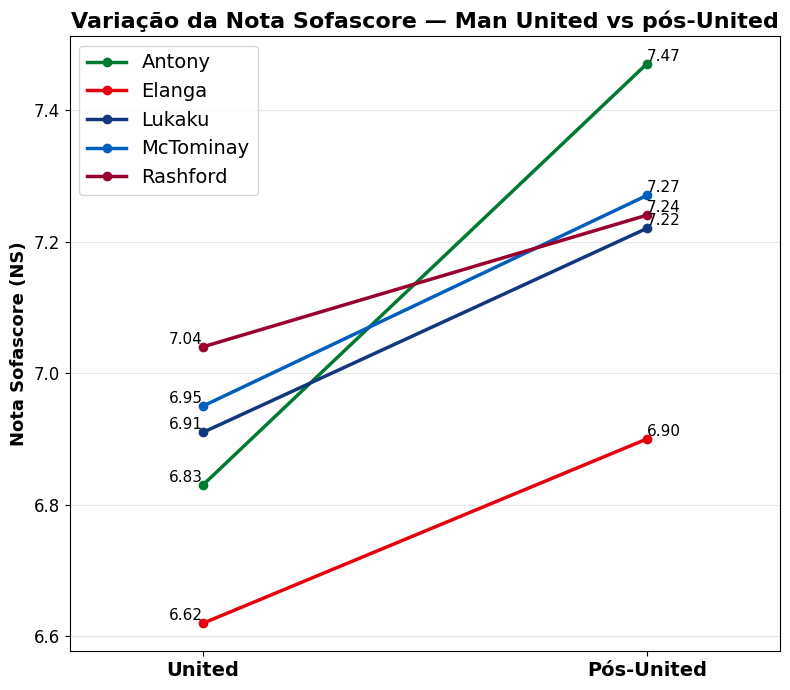

In [74]:
plt.figure(figsize=(8,7))

x_pos = [0, 1]
x_labels = ["United", "Pós-United"]

for _, row in pairs_df.iterrows():
    p = row["Jogador"]
    y_vals = [row["NS_United"], row["NS_Pos"]]
    plt.plot(x_pos, y_vals, marker="o",
             color=player_colors.get(p, (0.3,0.3,0.3)),
             linewidth=2.5, label=p)

    # valores
    plt.text(x_pos[0], y_vals[0], f"{y_vals[0]:.2f}",
             ha="right", va="bottom", fontsize=11)
    plt.text(x_pos[1], y_vals[1], f"{y_vals[1]:.2f}",
             ha="left", va="bottom", fontsize=11)

# centralizar os pontos
plt.xlim(-0.3, 1.3)   # dá espaço extra nas laterais
plt.xticks(x_pos, x_labels, fontsize=12, fontweight="bold")
plt.yticks(fontsize=12)
plt.ylabel("Nota Sofascore (NS)", fontsize=13, fontweight="bold")
plt.title("Variação da Nota Sofascore — Man United vs pós-United",
          fontsize=16, fontweight="bold")
plt.grid(True, axis="y", alpha=0.3)
plt.legend(title="Jogador", fontsize=11, title_fontsize=12, ncols=2, frameon=False)

plt.xticks(fontsize=14)  # rótulos do eixo X
plt.yticks(fontsize=12)              # rótulos do eixo Y
plt.legend(fontsize=14)

plt.tight_layout()
plt.show()


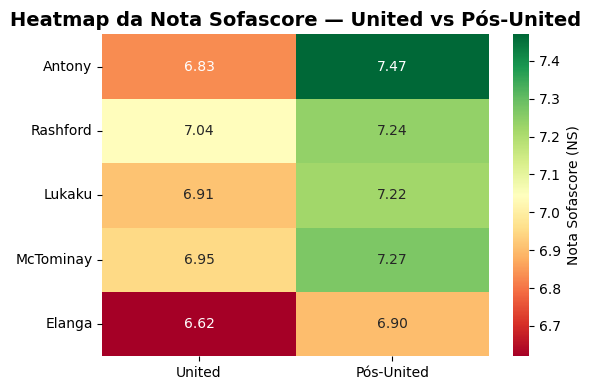

In [76]:
# Correção: não precisamos usar pivot, apenas set_index e selecionar colunas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Dados extraídos do gráfico anterior
data = {
    'Jogador': ['Antony', 'Rashford', 'Lukaku', 'McTominay', 'Elanga'],
    'United': [6.83, 7.04, 6.91, 6.95, 6.62],
    'Pós-United': [7.47, 7.24, 7.22, 7.27, 6.90]
}

df = pd.DataFrame(data)

# Criar heatmap diretamente
heatmap_data = df.set_index("Jogador")[["United", "Pós-United"]]

plt.figure(figsize=(6,4))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="RdYlGn", cbar_kws={'label': 'Nota Sofascore (NS)'})
plt.title("Heatmap da Nota Sofascore — United vs Pós-United", fontsize=14, fontweight="bold")
plt.xlabel("")
plt.ylabel("")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
